## Import libraries


In [4]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud, STOPWORDS

ModuleNotFoundError: No module named 'wordcloud'

## Data

In [ ]:
import pandas as pd
# read files
unprocessed_df = pd.read_csv("../Data/US_videos.csv")

# read json file
with open("../Data/US_category_id.json") as train_file:
    categories = json.load(train_file)["items"]
unprocessed_df.head()

In [5]:
def get_category_id(categories):
    cat_dict = {}
    for cat in categories:
        cat_dict[int(cat["id"])] = cat["snippet"]["title"]
    return cat_dict

cat_dict = get_category_id(categories)
unprocessed_df['category_name'] = unprocessed_df['category_id'].map(cat_dict)
unprocessed_df.head(2)

NameError: name 'categories' is not defined

In [6]:
unprocessed_df.isnull().sum()
# Only desc has nulls 

NameError: name 'unprocessed_df' is not defined

Filter for the last row

In [7]:
idx = unprocessed_df.groupby(['video_id'])['trending_date'].transform(max) == unprocessed_df['trending_date']

unprocessed_df = unprocessed_df[idx]

NameError: name 'unprocessed_df' is not defined

In [8]:
#df statistics
unprocessed_df.describe()

NameError: name 'unprocessed_df' is not defined

We first need to define popularity levels. The levels can be defined using #comments. #views, #likes and #dislikes. 
Lets analyze the distribution of these variables. As the scale of the variables is really high the variables are transformed
on a log scale

In [9]:
unprocessed_df[['views_log', 'dislikes_log', 'likes_log']] = np.log(unprocessed_df[['views', 'dislikes', 'likes']] +1)

unprocessed_df.head(2)

NameError: name 'unprocessed_df' is not defined

NameError: name 'unprocessed_df' is not defined

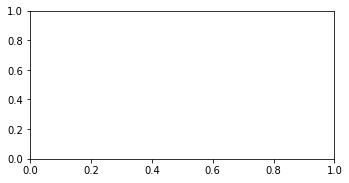

In [10]:
plt.figure(figsize = (12,6))
plt.subplot(221)
g1 = sns.distplot(unprocessed_df['views_log'])
g1.set_title("VIEWS LOG DISTRIBUITION", fontsize=16)

plt.subplot(224)
g2 = sns.distplot(unprocessed_df['likes_log'],color='green')
g2.set_title('LIKES LOG DISTRIBUITION', fontsize=16)

plt.subplot(223)
g3 = sns.distplot(unprocessed_df['dislikes_log'], color='r')
g3.set_title("DISLIKES LOG DISTRIBUITION", fontsize=16)

plt.show()



## Month wise distribution for published time

In [ ]:
unprocessed_df['publish_time'] = pd.to_datetime(unprocessed_df['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
unprocessed_df['published_month'] = unprocessed_df['publish_time'].dt.month
# plt.subplot(211)
# g = sns.lineplot(x = 'published_month', y = "x", data=unprocessed_df, palette="Set1", estimator = lambda unprocessed_df: np.mean(unprocessed_df['views']))
# g.set_xticklabels(g.get_xticklabels(),rotation=45)
# g.set_title("Counting Months ", fontsize=20)
# g.set_xlabel("Months", fontsize=15)
# g.set_ylabel("Count", fontsize=15)

Months from june till Nov has very less published videos. Maximum videos are published in the month of May.


## Month wise distribution for trending date

In [11]:
unprocessed_df['trending_date'] = pd.to_datetime(unprocessed_df['trending_date'], format='%y.%d.%m')
unprocessed_df['trending_month'] = unprocessed_df['trending_date'].dt.month

plt.subplot(211)
g = sns.countplot('trending_month', data=unprocessed_df, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counting Months ", fontsize=20)
g.set_xlabel("Months", fontsize=15)
g.set_ylabel("Count", fontsize=15)

NameError: name 'unprocessed_df' is not defined

Months from june till Nov do not have trending data.

## Day wise distribution for published time

In [12]:
unprocessed_df['publish_time_dayofweek'] = unprocessed_df['publish_time'].dt.dayofweek+1
plt.subplot(211)
g = sns.countplot('publish_time_dayofweek', data=unprocessed_df, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counting dayofweek", fontsize=20)
g.set_xlabel("Day of week", fontsize=15)
g.set_ylabel("Count", fontsize=15)

NameError: name 'unprocessed_df' is not defined

In [13]:
unprocessed_df['publish_weekend'] = unprocessed_df['publish_time_dayofweek']>5
unprocessed_df.head(2)

NameError: name 'unprocessed_df' is not defined

Surprisingly weekends (6 & 7) has less published videos that weekdays


## Day wise distribution for trending date

In [14]:
unprocessed_df['trending_dayofweek'] = unprocessed_df['trending_date'].dt.dayofweek+1

print(unprocessed_df['trending_dayofweek'].value_counts())
plt.subplot(211)
g = sns.countplot('trending_dayofweek', data=unprocessed_df, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counting Months ", fontsize=20)
g.set_xlabel("Months", fontsize=15)
g.set_ylabel("Count", fontsize=15)

NameError: name 'unprocessed_df' is not defined

In [15]:
unprocessed_df['trending_weekend'] = unprocessed_df['trending_dayofweek']>5
unprocessed_df.head(2)


NameError: name 'unprocessed_df' is not defined

All weeks have more or less same trending counts in the data

In [16]:
# separates date and time into two columns from 'publish_time' column
unprocessed_df['time'] = unprocessed_df['publish_time'].dt.time

unprocessed_df[['hour','min','sec']] = unprocessed_df['time'].astype(str).str.split(':', expand=True).astype(int)

unprocessed_df['hour'][:5]

NameError: name 'unprocessed_df' is not defined

NameError: name 'unprocessed_df' is not defined

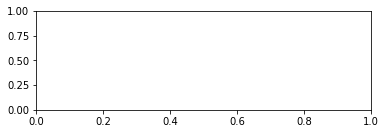

In [17]:
plt.subplot(211)
g = sns.countplot('hour', data=unprocessed_df, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counting Hour ", fontsize=20)
g.set_xlabel("Hours", fontsize=15)
g.set_ylabel("Count", fontsize=15)

In [18]:
unprocessed_df.columns

NameError: name 'unprocessed_df' is not defined

NameError: name 'unprocessed_df' is not defined

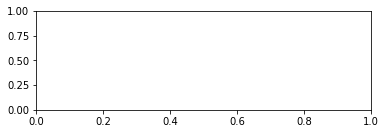

In [19]:
plt.subplot(212)
g = sns.countplot('category_name', data=unprocessed_df, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counting Hour ", fontsize=20)
g.set_xlabel("Category", fontsize=15)
g.set_ylabel("Count", fontsize=15)

Maximum videos are published during 15,16,17 hours. 

## Visualizing title data with wordcloud

In [ ]:
plt.figure(figsize = (15,15))

stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=150,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(unprocessed_df['title']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - DESCRIPTION")
plt.axis('off')
plt.show()

In [20]:
#Word count in each comment:
unprocessed_df['count_word']=unprocessed_df["title"].apply(lambda x: len(str(x).split()))
unprocessed_df['count_word_tags']=unprocessed_df["tags"].apply(lambda x: len(str(x).split()))

#Unique word count
unprocessed_df['count_unique_word']=unprocessed_df["title"].apply(lambda x: len(set(str(x).split())))
unprocessed_df['count_unique_word_tags']=unprocessed_df["tags"].apply(lambda x: len(set(str(x).split())))


unprocessed_df['count_tags']=unprocessed_df["tags"].apply(lambda x: len(set(str(x).split("|"))))



NameError: name 'unprocessed_df' is not defined

In [21]:
unprocessed_df.columns

NameError: name 'unprocessed_df' is not defined

In [22]:
def outcome(unprocessed_df, w1,w2,w3, iter = 1):
    unprocessed_df['neutral']=unprocessed_df['views']-unprocessed_df['likes']-unprocessed_df['dislikes']
    y=w1*unprocessed_df['likes']+w2*unprocessed_df['neutral']+w3*unprocessed_df['dislikes']
    unprocessed_df["y_cat_"+ str(iter)] =pd.qcut(y,3,labels=["low", "medium", "high"])  
    return unprocessed_df

unprocessed_df = outcome(unprocessed_df, 1/3,1/3,1/3, 1) # equally important
unprocessed_df = outcome(unprocessed_df, 1/2,1/4,1/4, 2) # likes more important
unprocessed_df = outcome(unprocessed_df, 1/2,3/8,1/8, 3) # likes more important

NameError: name 'unprocessed_df' is not defined

In [23]:
unprocessed_df.to_csv("../Data/features_data.csv") 

NameError: name 'unprocessed_df' is not defined

In [24]:
unprocessed_df.shape

NameError: name 'unprocessed_df' is not defined

In [25]:
corr = unprocessed_df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

NameError: name 'unprocessed_df' is not defined

In [26]:
idx = unprocessed_df.groupby(['video_id'])['trending_date'].transform(max) == unprocessed_df['trending_date']

check = unprocessed_df[idx]

NameError: name 'unprocessed_df' is not defined

In [27]:
corr = check.corr()
corr 





NameError: name 'check' is not defined

In [29]:
from sklearn.neural_network import MLPClassifier
import numpy as np
unprocessed_df = pd.read_csv("features_data.csv")
new = unprocessed_df[['likes','dislikes','comment_count']]
mlp = MLPClassifier()

mlp.fit(new, y)

FileNotFoundError: [Errno 2] File b'features_data.csv' does not exist: b'features_data.csv'